In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

**LEO EL ARCHIVO DE "LISTINGS.CSV"**





In [4]:
data = pd.read_csv('listings.csv', encoding='latin-1')

**Etapa 2: Extracción, limpieza y transformación**

In [5]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20250625031918,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20250625031918,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.47,NaN,f,9,4,2,0,0.39
2,56074,https://www.airbnb.com/rooms/56074,20250625031918,2025-07-01,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,...,4.94,4.76,4.79,NaN,f,1,1,0,0,0.48
3,67703,https://www.airbnb.com/rooms/67703,20250625031918,2025-07-01,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.92,4.98,4.92,NaN,f,2,2,0,0,0.30
4,70644,https://www.airbnb.com/rooms/70644,20250625031918,2025-07-01,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,...,4.98,4.96,4.92,NaN,f,3,2,1,0,0.81


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26401 non-null  int64  
 1   listing_url                                   26401 non-null  object 
 2   scrape_id                                     26401 non-null  int64  
 3   last_scraped                                  26401 non-null  object 
 4   source                                        26401 non-null  object 
 5   name                                          26401 non-null  object 
 6   description                                   25633 non-null  object 
 7   neighborhood_overview                         13970 non-null  object 
 8   picture_url                                   26401 non-null  object 
 9   host_id                                       26401 non-null 

Empecamos con 79 columnas y 26401 datos maximos. Podemos apreciar columnas sin datos, varios datos faltantes y varias columnas que no nos sirven para nuestro analísis.

In [7]:
data.price.isnull().sum()

3274

3274 datos faltantes en "price" la variable mas importante.

**Borramos los 3 datos nulos**

In [8]:
data.dropna(subset=["price"], inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23127 non-null  int64  
 1   listing_url                                   23127 non-null  object 
 2   scrape_id                                     23127 non-null  int64  
 3   last_scraped                                  23127 non-null  object 
 4   source                                        23127 non-null  object 
 5   name                                          23127 non-null  object 
 6   description                                   22538 non-null  object 
 7   neighborhood_overview                         12293 non-null  object 
 8   picture_url                                   23127 non-null  object 
 9   host_id                                       23127 non-null  int6

Tenemos datos cuantitativos y cualitativo. Dentro de los cuantitativos tenemos "int64" (enteros) y float64 "pueden tener decimales". Por otro lado, las variables "object" pueden ser tanto cuantitativo o cualitativo dependiendo como escribieron la variable. En caso de que tenga que ser cuantitativo y es cualitativo se puede cambiar o se puede sacar información de ese texto "object" y pasarlo a otra columna númerica como información.


**CHECAMOS DUPLICADOS**

In [10]:
duplicados=data.duplicated().sum()
duplicados

0

**NO HAY DUPLICADOS**

**BORRAMOS COLUMNAS SIN DATOS**

In [11]:
del data['license']
del data['neighbourhood_group_cleansed']
del data['calendar_updated']
del data['neighbourhood']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23127 non-null  int64  
 1   listing_url                                   23127 non-null  object 
 2   scrape_id                                     23127 non-null  int64  
 3   last_scraped                                  23127 non-null  object 
 4   source                                        23127 non-null  object 
 5   name                                          23127 non-null  object 
 6   description                                   22538 non-null  object 
 7   neighborhood_overview                         12293 non-null  object 
 8   picture_url                                   23127 non-null  object 
 9   host_id                                       23127 non-null  int6

In [13]:
del data['id']
del data['picture_url']
del data['listing_url']
del data['last_scraped']
del data['host_id']
del data['scrape_id']
del data['host_url']
del data['host_since']
del data['host_location']
del data['host_response_time']
del data['host_response_rate']
del data['host_acceptance_rate']
del data['host_thumbnail_url']
del data['host_picture_url']
del data['host_neighbourhood']
del data['host_verifications']
del data['host_has_profile_pic']
del data['host_identity_verified']
del data['has_availability']
del data['availability_30']
del data['availability_60']
del data['availability_90']
del data['first_review']
del data['last_review']
del data['instant_bookable']
del data['review_scores_accuracy']
del data['review_scores_cleanliness']
del data['review_scores_checkin']
del data['review_scores_communication']
del data['review_scores_location']
del data['review_scores_value']
del data['reviews_per_month']

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        23127 non-null  object 
 1   name                                          23127 non-null  object 
 2   description                                   22538 non-null  object 
 3   neighborhood_overview                         12293 non-null  object 
 4   host_name                                     22295 non-null  object 
 5   host_about                                    13518 non-null  object 
 6   host_is_superhost                             21908 non-null  object 
 7   host_listings_count                           22240 non-null  float64
 8   host_total_listings_count                     22240 non-null  float64
 9   neighbourhood_cleansed                        23127 non-null  obje

In [15]:
del data['host_is_superhost']
del data['host_listings_count']
del data['minimum_minimum_nights']
del data['maximum_minimum_nights']
del data['minimum_maximum_nights']
del data['maximum_maximum_nights']

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        23127 non-null  object 
 1   name                                          23127 non-null  object 
 2   description                                   22538 non-null  object 
 3   neighborhood_overview                         12293 non-null  object 
 4   host_name                                     22295 non-null  object 
 5   host_about                                    13518 non-null  object 
 6   host_total_listings_count                     22240 non-null  float64
 7   neighbourhood_cleansed                        23127 non-null  object 
 8   latitude                                      23127 non-null  float64
 9   longitude                                     23127 non-null  floa

Para datos faltantes pusimos "Not provided" en columnas específicas.

In [17]:
cols_texto = [
    'description', 'neighborhood_overview', 'host_name',
    'host_about', 'bathrooms_text'
]

for col in cols_texto:
    data[col] = data[col].fillna("Not provided")


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        23127 non-null  object 
 1   name                                          23127 non-null  object 
 2   description                                   23127 non-null  object 
 3   neighborhood_overview                         23127 non-null  object 
 4   host_name                                     23127 non-null  object 
 5   host_about                                    23127 non-null  object 
 6   host_total_listings_count                     22240 non-null  float64
 7   neighbourhood_cleansed                        23127 non-null  object 
 8   latitude                                      23127 non-null  float64
 9   longitude                                     23127 non-null  floa

Extraemos información importante de la columna "bathrooms_text" para poder completar datos faltantes en la columna "bathrooms".

In [19]:
import re

def extract_bathrooms(text):
    if pd.isna(text):
        return None
    match = re.search(r"(\d+\.?\d*)", text)
    if match:
        return float(match.group(1))
    return None

data['bathrooms_parsed'] = data['bathrooms_text'].apply(extract_bathrooms)

# Usar bathrooms_parsed para rellenar bathrooms
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms_parsed'])

# Si todavía quedan NaN → llenar con mediana
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())

data.drop(columns=['bathrooms_parsed'], inplace=True)


Llenamos otros datos daltantes con diferentes técnicas. Por ejemplo: Con la variable "bedrooms" y "beds"llenamos con la mediana.

In [20]:
data['bedrooms'] = data.groupby('neighbourhood_cleansed')['bedrooms'].transform(
    lambda x: x.fillna(x.median())
)

data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())


In [21]:
data['beds'] = data['beds'].fillna(data['bedrooms'])
data['beds'] = data['beds'].fillna(data['beds'].median())


In [22]:
data['host_total_listings_count'] = data['host_total_listings_count'].fillna(
    data['host_total_listings_count'].median()
)


In [23]:
data['review_scores_rating'] = data.groupby('neighbourhood_cleansed')['review_scores_rating'].transform(
    lambda x: x.fillna(x.median())
)

data['review_scores_rating'] = data['review_scores_rating'].fillna(
    data['review_scores_rating'].median()
)


In [24]:
data['calendar_last_scraped'] = pd.to_datetime(data['calendar_last_scraped'])


In [25]:
data.isna().sum()

source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_about                                      0
host_total_listings_count                       0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0


In [26]:
data["bathrooms"].value_counts()

bathrooms
1.0     14997
2.0      4226
1.5      1551
2.5       766
3.0       544
3.5       230
4.0       220
0.0       125
4.5       104
0.5        84
5.0        77
6.0        55
5.5        32
8.0        23
6.5        19
7.0        15
7.5        11
10.0        7
8.5         6
12.0        6
11.5        6
9.0         5
13.0        3
20.0        2
12.5        2
10.5        2
15.0        2
11.0        1
16.0        1
14.5        1
17.0        1
49.0        1
46.0        1
21.0        1
Name: count, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   source                                        23127 non-null  object        
 1   name                                          23127 non-null  object        
 2   description                                   23127 non-null  object        
 3   neighborhood_overview                         23127 non-null  object        
 4   host_name                                     23127 non-null  object        
 5   host_about                                    23127 non-null  object        
 6   host_total_listings_count                     23127 non-null  float64       
 7   neighbourhood_cleansed                        23127 non-null  object        
 8   latitude                                      23127 non-null  float64  

In [28]:
data["calendar_last_scraped"].value_counts()

calendar_last_scraped
2025-07-01    6854
2025-06-27    5265
2025-06-26    3319
2025-07-02    2381
2025-06-28    1912
2025-06-30    1265
2025-06-25    1115
2025-06-29    1016
Name: count, dtype: int64

En esta etapa se limpió la base de datos por completo, dejando todas las variables con el mismo número de datos. Se borraron las columnas innecesarias y se llenaron datos faltantes mediante la mediana o información de otra columna (como en bathrooms).Todas las variables estan listas para modelar una regresión y realizar gráficas.

**Etapa** 3


In [29]:
data.shape

(23127, 37)

In [30]:
data.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_nights_avg_ntm,...,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,...,23127.000000,23127.000000,23127.000000,23127.000000,2.312700e+04,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000
mean,35.005491,19.406468,-99.165347,3.370000,1.450253,1.528992,1.952350,3.877330,488.838155,3.563056,...,1.101310,136.216933,14.938340,92.654343,1.300932e+05,4.762840,15.841268,12.827777,2.741125,0.233147
min,1.000000,19.177848,-99.339630,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,19.395013,-99.178300,2.000000,1.000000,1.000000,1.000000,1.000000,180.000000,1.000000,...,0.000000,105.000000,0.000000,6.000000,6.840000e+03,4.730000,1.000000,1.000000,0.000000,0.000000
50%,6.000000,19.415451,-99.167260,2.000000,1.000000,1.000000,1.000000,2.000000,365.000000,2.000000,...,0.000000,158.000000,6.000000,60.000000,5.796000e+04,4.830000,4.000000,2.000000,0.000000,0.000000
75%,18.000000,19.432254,-99.153978,4.000000,2.000000,2.000000,2.000000,2.000000,1120.000000,2.300000,...,2.000000,180.000000,22.000000,168.000000,1.751805e+05,4.930000,12.000000,7.000000,2.000000,0.000000
max,946.000000,19.549060,-98.966450,16.000000,49.000000,50.000000,50.000000,729.000000,1125.000000,729.000000,...,106.000000,190.000000,549.000000,255.000000,1.080000e+07,5.000000,235.000000,235.000000,70.000000,30.000000
std,119.586107,0.041457,0.033263,2.357602,1.033869,1.216194,1.754345,18.398414,397.887060,16.531031,...,2.182395,54.738672,22.215022,91.566019,2.316330e+05,0.348733,35.138272,34.744822,7.516344,2.171821


Apreciamos cuantos datos tienen las variables,la media, el mínimo, el máximo y los cuartiles de cada variable.

In [31]:
data.dtypes

source                                                  object
name                                                    object
description                                             object
neighborhood_overview                                   object
host_name                                               object
host_about                                              object
host_total_listings_count                              float64
neighbourhood_cleansed                                  object
latitude                                               float64
longitude                                              float64
property_type                                           object
room_type                                               object
accommodates                                             int64
bathrooms                                              float64
bathrooms_text                                          object
bedrooms                                               

In [32]:
data.isna().sum()

source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
host_name                                       0
host_about                                      0
host_total_listings_count                       0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bathrooms_text                                  0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0


Convertimos el precio a una variable cuantitativa, quitandole signos y comas que no permiten que sea cuantitativa.

In [33]:
# Limpiar y convertir price a float
data["price"] = (
    data["price"].astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

# Checar rápido
data["price"].head()
data["price"].describe()

count     23127.000000
mean       1989.292472
std       18500.684915
min          66.000000
25%         630.000000
50%        1039.000000
75%        1647.000000
max      900000.000000
Name: price, dtype: float64

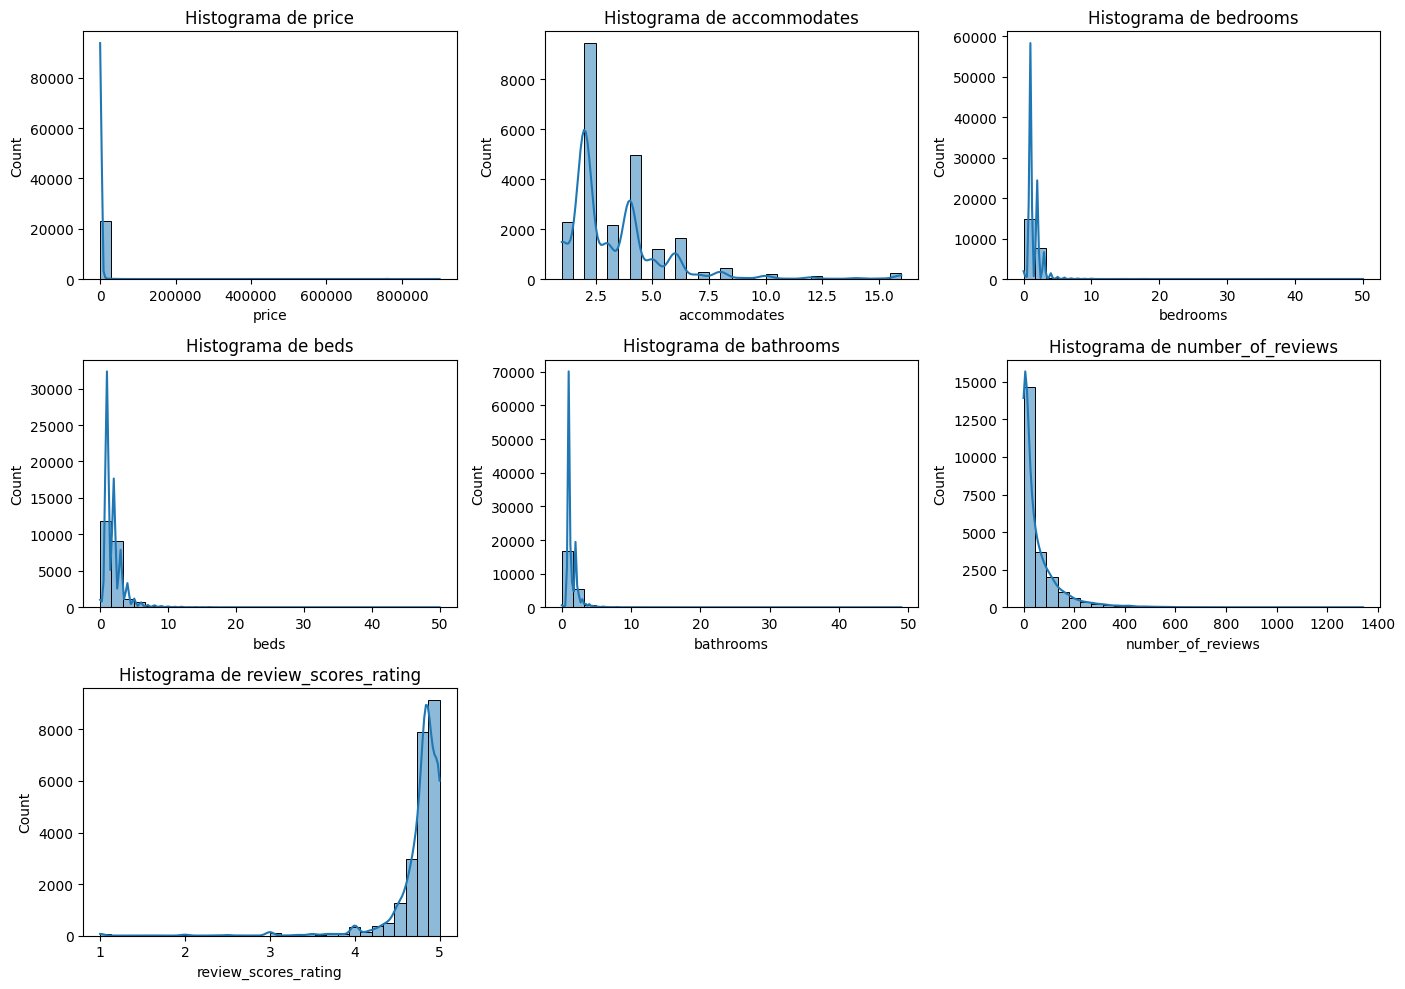

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ["price", "accommodates", "bedrooms", "beds",
             "bathrooms", "number_of_reviews", "review_scores_rating"]

plt.figure(figsize=(14,10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f"Histograma de {var}")
plt.tight_layout()
plt.show()


Diferentes histogramas que demuestran el comportamiento de diferentes variables. Podemos apreciar que el único que tiene un sesgo a la izquierda es la variable "review_scores_rating" por otro lado, todas las otras variables muestran un sesgo a la derecha.

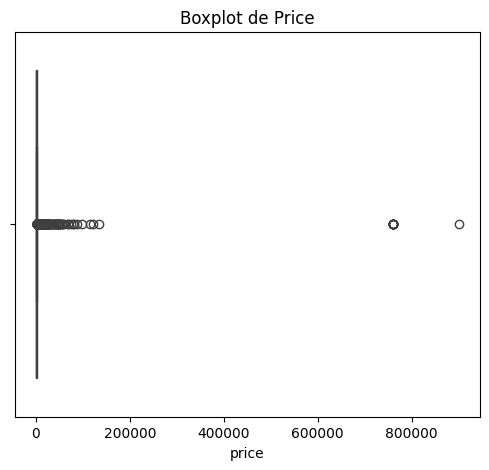

In [35]:
plt.figure(figsize=(6,5))
sns.boxplot(x=data["price"])
plt.title("Boxplot de Price")
plt.show()


El comportamiento del precio esta mayormente por debajo de 200,000 con dos outliers pasando 600,000.

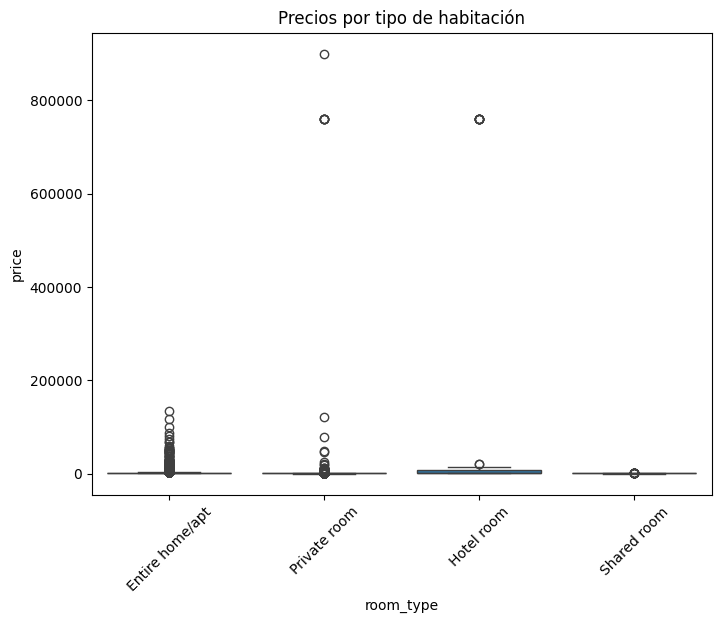

In [36]:
plt.figure(figsize=(8,6))
sns.boxplot(x="room_type", y="price", data=data)
plt.title("Precios por tipo de habitación")
plt.xticks(rotation=45)
plt.show()


Con estas gráficas boxplot podemos apreciar que todas menos "shared room" tienen outliers. La variable "Entire home/ apt" cuanta con varios outliers pero todos estan muy cerca estando por debajo de la marca de 200,000. Por otro lado, las variables de "private room" y "hotel room" cuantan con al menos un outlier que ronda por arriba de los 600,000.

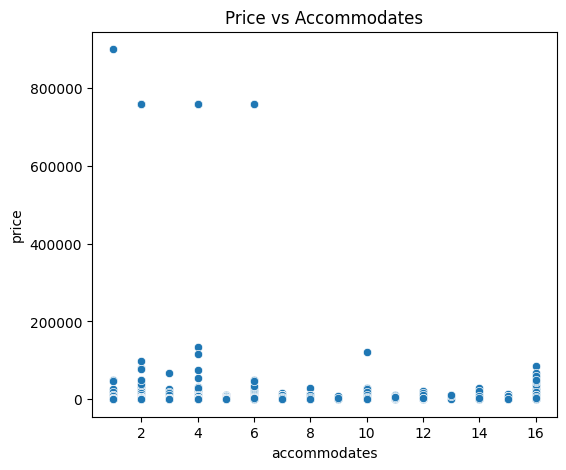

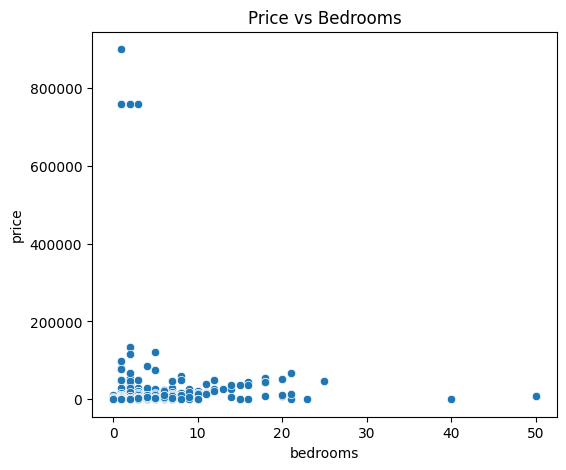

In [37]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="accommodates", y="price", data=data)
plt.title("Price vs Accommodates")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x="bedrooms", y="price", data=data)
plt.title("Price vs Bedrooms")
plt.show()


Estos diagramas de dispersión son muy útiles para ver la relación entre dos variables. Con el primero podemos apreciar que no necesariamente crece el precio conforme van creciendo los "accommodates" aunque pareciera que al final con 16 "accommodates" da un pequeño salto.
En cuanto a la relación de bedrooms y price, apreciamos que con la mayoría de los datos acaba con un máximo de casi 30 "bedrooms" si se puede apreciar una leve subida e precio dependiendo la cantidad de camas pero igulmente con datos menores a 10 camas se pueden ver precios incluso mas altos a los que tienen mas de 15 camas.

In [38]:
data["price"].value_counts()

price
450.0     148
900.0     114
855.0      97
600.0      97
1200.0     95
         ... 
3110.0      1
2934.0      1
2408.0      1
2129.0      1
3162.0      1
Name: count, Length: 3957, dtype: int64

In [39]:
data["price"].dtype


dtype('float64')

In [40]:
Q1 = data["price"].quantile(0.25)
Q3 = data["price"].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

data = data[(data["price"] >= lim_inf) & (data["price"] <= lim_sup)]
print(lim_inf)
print(lim_sup)

-895.5
3172.5


Para mejorar el modelo, eliminé valores atípicos del precio usando el método IQR (Rango Intercuartílico)

Dataset

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd



In [42]:
numeric_vars = [
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "minimum_nights",
    "availability_365",
    "number_of_reviews",
    "review_scores_rating"
]

categorical_vars = [
    "property_type",
    "room_type",
    "neighbourhood_cleansed"
]

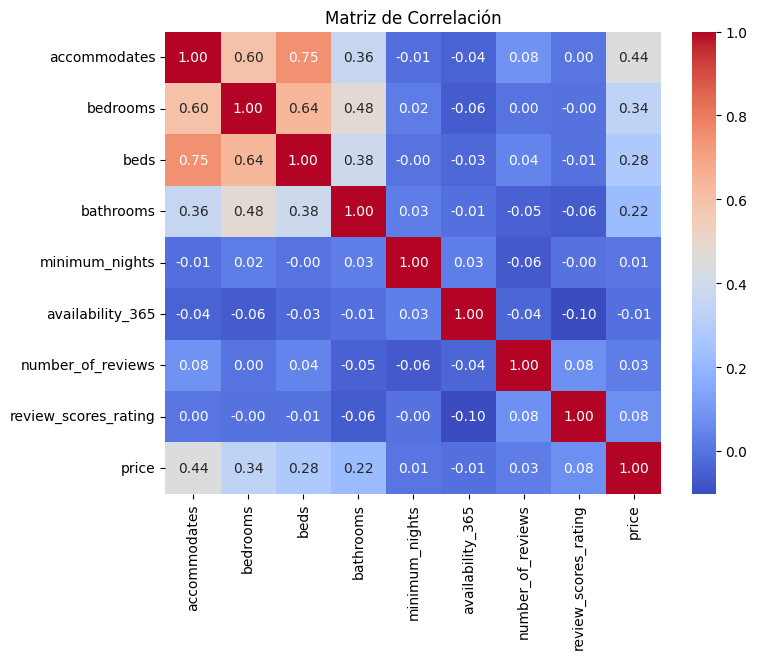

In [43]:
corr = data[numeric_vars + ["price"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Mediante este diagrama podemos apreciar que variables podrían ser utiles para la regresión lineal. Normalmente las que tienen un valor mas alto sin importar el signo podrían ayudar a crear una buena regresión lineal. Como estamos haciendo para precio, acommodates, bedrooms, beds y bathrooms sí ayudan al modelo.

In [44]:
numeric_vars = [c for c in numeric_vars if c in data.columns]
categorical_vars = [c for c in categorical_vars if c in data.columns]

all_vars = numeric_vars + categorical_vars

In [45]:
df = data[["price"] + all_vars].dropna()

X = df[all_vars]
y = df["price"]

In [46]:
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=42
)

La regresión se entrena con 70% de los datos y se prueba con el 30% faltante.

In [48]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
y_pred = reg_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

**Modelo creado**

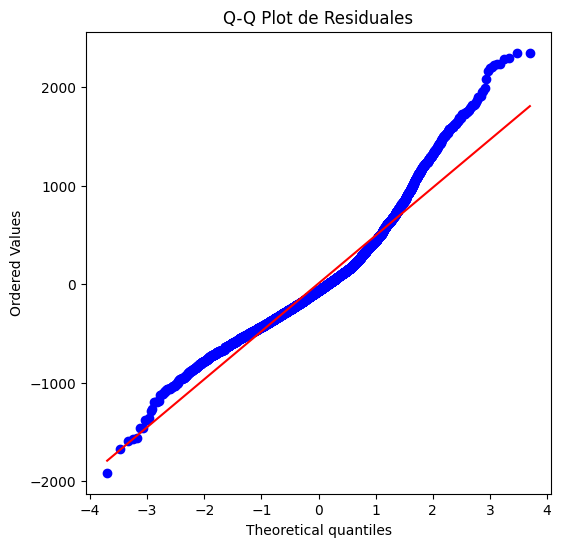

In [50]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calcular residuales
residuals = y_test - y_pred

# Q-Q Plot
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot de Residuales")
plt.show()


Gráfica que demuestra el comportamieno de nuestro modelo.

In [51]:
print("R²:", r2)

R²: 0.40469132835752053


Con nuestro modelo se obtuvo una R² con los diferentes variables numpericos y categóricos.

Variables númericos:


*   "accommodates"
*   "bedrooms"
*   "beds"
*   "bathrooms"
*   "minimum_nights"
*   "availability_365"
*   "number_of_reviews"
*   "review_scores_rating"

Variables categóricos:

*   "property_type"
*   "room_type"
*   "neighbourhood_cleansed"









In [52]:
# Intercepto
b0 = reg_model.intercept_
print("b0 (intercept):", b0)

# Coeficientes
print("Coefficients from model.coef_:")
print(reg_model.coef_)

# Número de coeficientes
print("Number of coefficients:", len(reg_model.coef_))

# Coeficientes con nombres de variables
coef_table = pd.DataFrame({
    "variable": X.columns,
    "coef": reg_model.coef_
})

print("\nCoeficientes por variable:")
print(coef_table)




b0 (intercept): -782.2537589166482
Coefficients from model.coef_:
[ 1.01735931e+02  6.63591363e+01 -4.58962386e+01  8.64329470e+01
 -3.33772560e-01  2.82823359e-01 -4.14499711e-01  1.34902770e+02
  8.34256310e+02  1.93727322e+03  4.86622132e+02  4.38050153e+01
  6.35758260e+02  7.69589236e+02  6.62547606e+02  5.72539154e+02
  3.26609661e+02  3.06299476e+02  1.81897790e+02  6.80457189e+02
  1.48835934e+03 -5.41149348e-11  5.08360221e+02  7.31869708e+02
  6.09776607e+02  6.07864590e+02  6.34967312e+02  5.61595014e+02
  5.90670948e+02  1.86758187e+02  7.13269108e+02  3.63948189e+02
  2.25564866e+02  4.10886091e+02  5.45018130e+02  2.50827456e+02
  3.52674472e+02  2.28247319e+02  7.05131359e+02  6.99113069e+02
 -1.81898940e-12  3.36379561e+02  1.21025246e+02  2.41055892e+02
  4.36739048e+02  1.21502115e+03  1.72255964e+02  3.29782688e+02
 -1.47792889e-12  4.52731705e+02  2.12363521e+02 -3.59431505e+01
  2.82206036e+02  4.05706659e+02  1.62503413e+03  1.88104763e+02
  4.70152835e+02  3.4907

In [53]:
residuals = y_test - y_pred


**Histograma de residuales del modelo.**

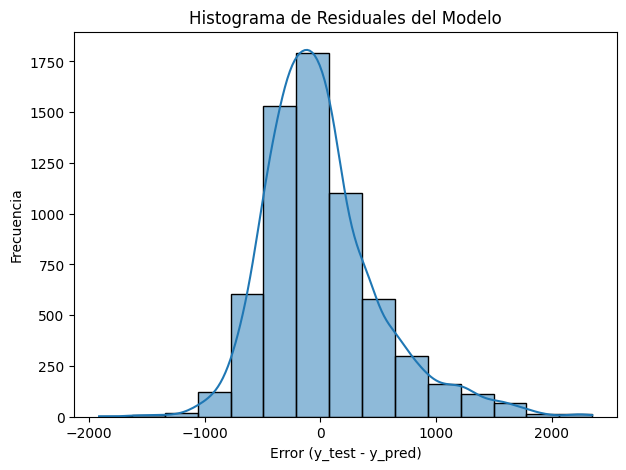

In [54]:
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=15, kde=True)
plt.title('Histograma de Residuales del Modelo')
plt.xlabel('Error (y_test - y_pred)')
plt.ylabel('Frecuencia')
plt.show()


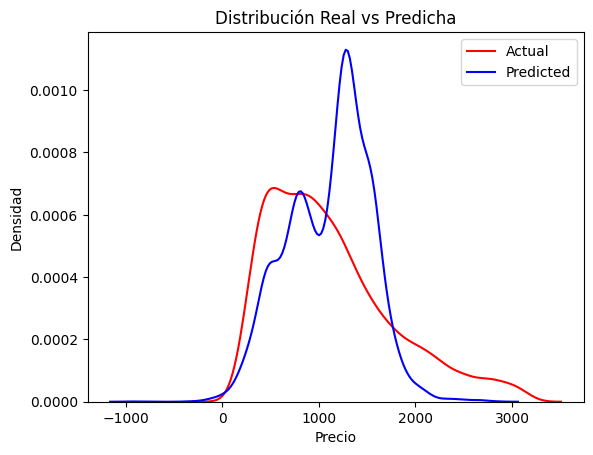

In [55]:
ax1 = sns.kdeplot(y_test, color="r", label="Actual")
sns.kdeplot(y_pred, color="b", label="Predicted", ax=ax1)

plt.title("Distribución Real vs Predicha")
plt.xlabel("Precio")
plt.ylabel("Densidad")
plt.legend()
plt.show()


El modelo de regresión lineal logró explicar una parte  de la variabilidad del precio, especialmente después de eliminar mediante IQR, lo que mejoró el R² a aproximadamente 0.40. Aun presenta limitaciones debido a la dispersión del precio en Airbnb. Aun así, el modelo funciona como una herramienta inicial para estimar precios y entender qué variables tienen mayor impacto en ellos.

## Modelo predictivo Uniandes

### Pregunta 1

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

c:\Users\natha\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\natha\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\natha\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [57]:
# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def entrenar_modelo(neuronas_capa1, neuronas_capa2, learning_rate,
                    epochs, batch_size, activacion, nombre_run):

    # Definir el modelo
    model = Sequential([
        Dense(neuronas_capa1, activation=activacion, input_shape=(X_train_scaled.shape[1],)),
        Dense(neuronas_capa2, activation=activacion),
        Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error']
    )

    print(f"Entrenando: {nombre_run}")

    # Entrenamiento
    history = model.fit(
        X_train_scaled, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )

    # Evaluación
    test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"✔ Test MAE: {test_mae:.2f}")

    return model, test_mae, history

In [58]:
#Experimentos a realizar
lista_experimentos = [
    (64, 32, 0.001, 50, 32, "relu",  "NN_relu_64x32"),
    (64, 32, 0.001, 50, 32, "tanh",  "NN_tanh_64x32"),
    (128, 64, 0.001, 50, 32, "relu", "NN_relu_128x64"),
    (128, 64, 0.001, 50, 32, "selu", "NN_selu_128x64"),
    (128, 64, 0.0005, 80, 32, "relu", "NN_relu_128x64_lento"),
]

In [59]:
#Evaluar experimentos y seleccionar el mejor modelo
mejor_mae = np.inf
mejor_modelo = None
mejor_config = None
mejor_history = None

for n1, n2, lr, ep, bs, act, name in lista_experimentos:
    modelo_tmp, mae_tmp, history_tmp = entrenar_modelo(n1, n2, lr, ep, bs, act, name)

    if mae_tmp < mejor_mae:
        mejor_mae = mae_tmp
        mejor_modelo = modelo_tmp
        mejor_config = name
        mejor_history = history_tmp

print(f"Mejor modelo: {mejor_config} con MAE = {mejor_mae:.2f}")

c:\Users\natha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando: NN_relu_64x32
✔ Test MAE: 334.45
Entrenando: NN_tanh_64x32


c:\Users\natha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✔ Test MAE: 603.55
Entrenando: NN_relu_128x64


c:\Users\natha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✔ Test MAE: 328.30
Entrenando: NN_selu_128x64


c:\Users\natha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✔ Test MAE: 352.38
Entrenando: NN_relu_128x64_lento


c:\Users\natha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✔ Test MAE: 328.98
Mejor modelo: NN_relu_128x64 con MAE = 328.30


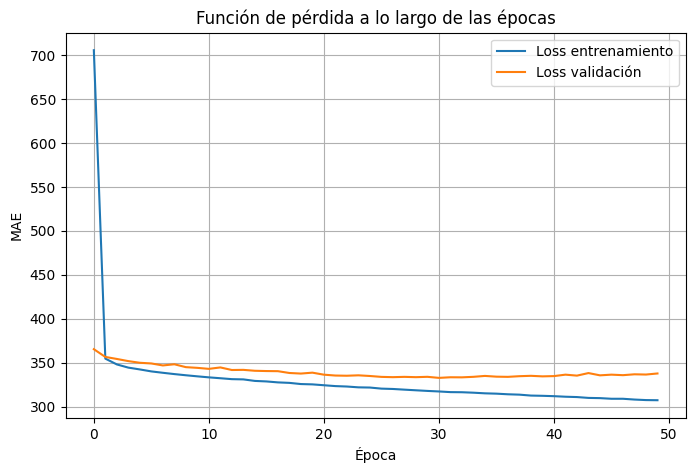

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(mejor_history.history['loss'], label='Loss entrenamiento')
plt.plot(mejor_history.history['val_loss'], label='Loss validación')
plt.title("Función de pérdida a lo largo de las épocas")
plt.xlabel("Época")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

### Pregunta 2

In [61]:
# Seleccionar un departamento base (representativo)
base_df = X_train.iloc[[0]].copy()

def predecir(df_sim):
    X_sim_scaled = scaler.transform(df_sim[X_train.columns])
    return mejor_modelo.predict(X_sim_scaled)[0][0]

precio_base = predecir(base_df)
print(f"Precio base predicho: {precio_base:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Precio base predicho: 972.59


#### Analisis sensibildiad puntuacion

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


,rating,precio
0,3.0,763.875977
1,3.2,752.022217
2,3.4,743.217224
3,3.6,737.393005
4,3.8,736.841980
5,4.0,736.803345
6,4.2,743.320496
7,4.4,770.494080
8,4.6,813.810547
9,4.8,885.343384


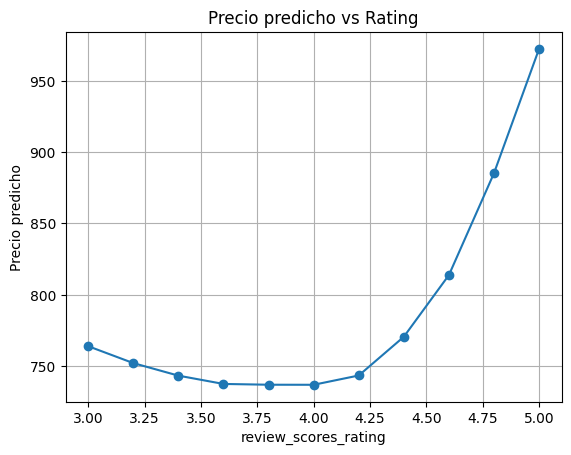

In [62]:
resultados_rating = []

for r in np.linspace(3.0, 5.0, 11):  # rango REAL de rating
    sim = base_df.copy()
    sim["review_scores_rating"] = r
    precio = predecir(sim)
    resultados_rating.append({"rating": r, "precio": precio})

df_rating = pd.DataFrame(resultados_rating)
display(df_rating)

plt.plot(df_rating["rating"], df_rating["precio"], marker="o")
plt.title("Precio predicho vs Rating")
plt.xlabel("review_scores_rating")
plt.ylabel("Precio predicho")
plt.grid(True)
plt.show()

#### Sensibilidad numero de huespedes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


,accommodates,precio
0,1,909.121582
1,2,972.591614
2,3,1034.071533
3,4,1093.292480
4,5,1155.088867
5,6,1221.799683
6,7,1299.026733
7,8,1382.163330
8,9,1467.835327
9,10,1561.833252


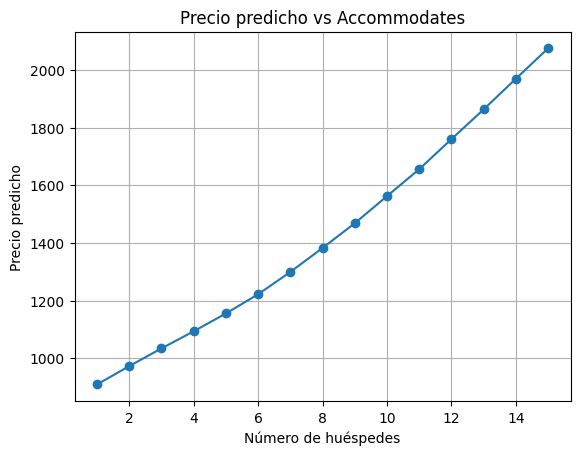

In [63]:
resultados_acc = []

for acc in range(1, 16):
    sim = base_df.copy()
    sim["accommodates"] = acc
    precio = predecir(sim)
    resultados_acc.append({"accommodates": acc, "precio": precio})

df_acc = pd.DataFrame(resultados_acc)
display(df_acc)

plt.plot(df_acc["accommodates"], df_acc["precio"], marker="o")
plt.title("Precio predicho vs Accommodates")
plt.xlabel("Número de huéspedes")
plt.ylabel("Precio predicho")
plt.grid(True)
plt.show()


#### Sensibilidad tipo de habitación

In [64]:
resultados_room = []

categorias = X_train.filter(like="room_type_").columns

for cat in categorias:
    sim = base_df.copy()
    sim[categorias] = 0  # poner todas en 0
    sim[cat] = 1         # activar solo una
    precio = predecir(sim)
    resultados_room.append({"room_type": cat, "precio": precio})

df_room = pd.DataFrame(resultados_room)
display(df_room)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


,room_type,precio
0,room_type_Hotel room,1348.717773
1,room_type_Private room,828.887451
2,room_type_Shared room,430.620667


#### Sensibilidad numero de habitaciones

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


,bedrooms,precio
0,0,933.702148
1,1,972.591614
2,2,1013.782104
3,3,1052.422119
4,4,1086.948120
5,5,1127.886597
6,6,1173.828735


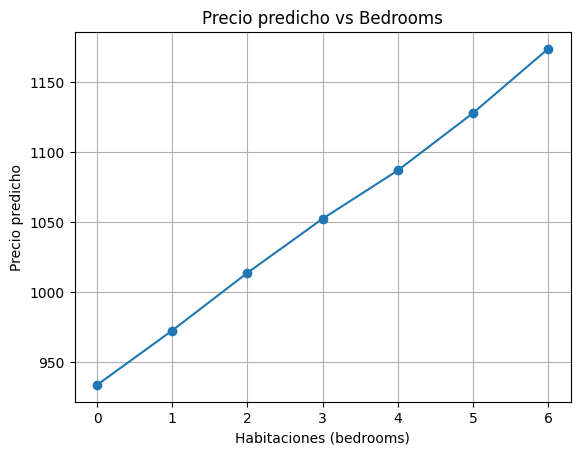

In [65]:
resultados_bedrooms = []

for br in range(0, 7):
    sim = base_df.copy()
    sim["bedrooms"] = br
    precio = predecir(sim)
    resultados_bedrooms.append({"bedrooms": br, "precio": precio})

df_bedrooms = pd.DataFrame(resultados_bedrooms)
display(df_bedrooms)

plt.plot(df_bedrooms["bedrooms"], df_bedrooms["precio"], marker="o")
plt.title("Precio predicho vs Bedrooms")
plt.xlabel("Habitaciones (bedrooms)")
plt.ylabel("Precio predicho")
plt.grid(True)
plt.show()

#### Sensibilidad numero de baños

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


,bathrooms,precio
0,0,879.234802
1,1,972.591614
2,2,1127.595825
3,3,1328.770752
4,4,1607.241821
5,5,1902.909546
6,6,2121.214111
7,7,2344.709473
8,8,2584.747803
9,9,2830.037842


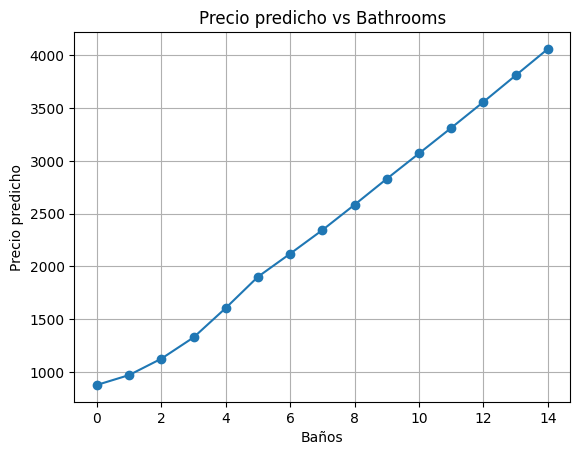

In [66]:
resultados_bathrooms = []

for b in range(0, 15):  # 1.0, 1.5, 2.0, ..., 4.0
    sim = base_df.copy()
    sim["bathrooms"] = b
    precio = predecir(sim)
    resultados_bathrooms.append({"bathrooms": b, "precio": precio})

df_bath = pd.DataFrame(resultados_bathrooms)
display(df_bath)

plt.plot(df_bath["bathrooms"], df_bath["precio"], marker="o")
plt.title("Precio predicho vs Bathrooms")
plt.xlabel("Baños")
plt.ylabel("Precio predicho")
plt.grid(True)
plt.show()


### pregunta 3

In [67]:
# y sigue siendo el precio real (de tu modelo de regresión)
umbral_precio = y.median()
print("Umbral de precio para ser recomendado:", umbral_precio)

# Variable binaria: 1 = recomendado, 0 = no recomendado
y_clas = (y > umbral_precio).astype(int)
y_clas.value_counts()


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clas, test_size=0.3, random_state=42, stratify=y_clas
)

scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

Umbral de precio para ser recomendado: 971.0


In [68]:
def entrenar_modelo_clas(neuronas_capa1, neuronas_capa2, learning_rate,
                         epochs, batch_size, activacion, nombre_run):

    n_features_clf = X_train_clf_scaled.shape[1]

    # Definir el modelo de clasificación
    model = Sequential([
        Dense(neuronas_capa1, activation=activacion, input_shape=(n_features_clf,)),
        Dense(neuronas_capa2, activation=activacion),
        Dense(1, activation='sigmoid')       # salida binaria
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Entrenamiento
    history = model.fit(
        X_train_clf_scaled, y_train_clf,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=0
    )

    # Evaluación
    test_loss, test_acc = model.evaluate(X_test_clf_scaled, y_test_clf, verbose=0)
    print(f"✔ Accuracy en test: {test_acc:.3f}")

    return model, test_acc

# Lista de experimentos
lista_experimentos_clf = [
    (64, 32, 0.001, 50, 32, "relu", "CLF_relu_64x32"),
    (64, 32, 0.001, 50, 32, "tanh", "CLF_tanh_64x32"),
    (128, 64, 0.001, 50, 32, "relu", "CLF_relu_128x64"),
]

# Selección del mejor modelo
mejor_acc = 0
mejor_modelo_clf = None
mejor_conf_clf = None

for n1, n2, lr, ep, bs, act, name in lista_experimentos_clf:
    modelo_tmp, acc_tmp = entrenar_modelo_clas(n1, n2, lr, ep, bs, act, name)

    if acc_tmp > mejor_acc:
        mejor_acc = acc_tmp
        mejor_modelo_clf = modelo_tmp
        mejor_conf_clf = name

print(f"Mejor clasificador: {mejor_conf_clf} con accuracy = {mejor_acc:.3f}")

c:\Users\natha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✔ Accuracy en test: 0.798
✔ Accuracy en test: 0.793
✔ Accuracy en test: 0.790
Mejor clasificador: CLF_relu_64x32 con accuracy = 0.798


In [69]:
X_all_scaled_clf = scaler_clf.transform(X)
prob_recomendado = mejor_modelo_clf.predict(X_all_scaled_clf).flatten()
labels_recomendado = (prob_recomendado >= 0.5).astype(int)

df_result_clf = pd.DataFrame({
    "precio_real": y.values,
    "prob_recomendado": prob_recomendado,
    "recomendado": labels_recomendado
})

df_result_clf.head()

668/668 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step


,precio_real,prob_recomendado,recomendado
0,585.0,0.252023,0
1,1696.0,0.812182,1
2,1004.0,0.859280,1
3,315.0,0.010286,0
4,1412.0,0.699023,1


## App

In [120]:
def fix_encoding(col):
    return (
        col
        .str.encode("latin1", errors="ignore")
        .str.decode("utf-8", errors="ignore")
    )

data["neighbourhood_cleansed"] = fix_encoding(data["neighbourhood_cleansed"])


In [128]:
# Tomamos una fila real del dataset como prueba
fila_test = df.iloc[[0]][all_vars]  

# One-hot EXACTAMENTE como X
fila_test_oh = pd.get_dummies(fila_test, columns=categorical_vars, drop_first=True)

# Reordenar columnas
fila_test_oh = fila_test_oh.reindex(columns=X.columns, fill_value=0)

print("Shapes:")
print("fila_test_oh:", fila_test_oh.shape)
print("X:", X.shape)


Shapes:
fila_test_oh: (1, 98)
X: (21375, 98)


In [129]:
pred_lin = reg_model.predict(fila_test_oh)[0]
print("Predicción regresión lineal:", pred_lin)


Predicción regresión lineal: 240.86016686804658


In [130]:
mejor_modelo_reg = mejor_modelo
scaler_reg = scaler


fila_scaled = scaler_reg.transform(fila_test_oh)
pred_nn = mejor_modelo_reg.predict(fila_scaled)[0][0]
print("Predicción red neuronal regresión:", pred_nn)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Predicción red neuronal regresión: 255.81343


In [131]:
fila_scaled_clf = scaler_clf.transform(fila_test_oh)
proba = mejor_modelo_clf.predict(fila_scaled_clf)[0][0]

print("Probabilidad recomendado:", proba)
print("Etiqueta:", "Recomendado" if proba >= 0.5 else "No recomendado")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Probabilidad recomendado: 0.07454507
Etiqueta: No recomendado


In [ ]:
# ============================================================
# APP EN DASH
# ============================================================

import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
from dash.exceptions import PreventUpdate
import plotly.express as px
import plotly.graph_objects as go

# ---- Alias de modelos para usarlos en la app ----
mejor_modelo_reg = mejor_modelo    # NN regresión
scaler_reg = scaler                # StandardScaler de la NN de regresión

# mejor_modelo_clf, scaler_clf y umbral_precio ya existen arriba

# ============================================================
# FILTROS PARA EL DASHBOARD
# ============================================================

if "neighbourhood_cleansed" in data.columns:
    neighbourhood_options = sorted(data["neighbourhood_cleansed"].dropna().unique())
else:
    neighbourhood_options = []

if "room_type" in data.columns:
    room_type_options = sorted(data["room_type"].dropna().unique())
else:
    room_type_options = []

price_min_train = float(y.min())
price_max_train = float(y.max())

price_min = float(data["price"].min())
price_max = float(data["price"].max())

reviews_min = int(data["number_of_reviews"].min())
reviews_max = int(data["number_of_reviews"].max())


def filtrar_df(neighbourhoods, room_types, price_range, reviews_range):
    dff = data.copy()

    if price_range is None:
        price_range = [price_min, price_max]
    if reviews_range is None:
        reviews_range = [reviews_min, reviews_max]

    if neighbourhoods and "neighbourhood_cleansed" in dff.columns:
        dff = dff[dff["neighbourhood_cleansed"].isin(neighbourhoods)]

    if room_types and "room_type" in dff.columns:
        dff = dff[dff["room_type"].isin(room_types)]

    dff = dff.dropna(subset=["price", "number_of_reviews"])

    dff = dff[
        (dff["price"] >= price_range[0])
        & (dff["price"] <= price_range[1])
        & (dff["number_of_reviews"] >= reviews_range[0])
        & (dff["number_of_reviews"] <= reviews_range[1])
    ]

    return dff



# ============================================================
# DISEÑO DE LA APP
# ============================================================

app = dash.Dash(__name__, suppress_callback_exceptions=True)
server = app.server

app.layout = html.Div(
    style={"backgroundColor": "#f2f2f2", "fontFamily": "Arial, sans-serif"},
    children=[
        # ENCABEZADO
        html.Div(
            style={
                "backgroundColor": "#2c3e50",
                "padding": "15px",
                "color": "white",
                "textAlign": "center",
            },
            children=[
                html.H1("Dashboard Airbnb CDMX – modelos Uniandes"),
                html.P(
                    "Explora el mercado y usa los tres modelos: "
                    "regresión lineal, red neuronal de regresión y red neuronal de clasificación."
                ),
            ],
        ),

        # FILTROS
        # FILTROS
        html.Div(
            style={"padding": "20px"},
            children=[
                html.Div(
                    style={"display": "flex", "gap": "20px"},
                    children=[
                        html.Div(
                            style={"flex": "1"},
                            children=[
                                html.Label("Vecindarios:", style={"fontWeight": "bold"}),
                                dcc.Dropdown(
                                    id="filter-neighbourhood",
                                    options=[{"label": n, "value": n} for n in neighbourhood_options],
                                    multi=True,
                                    placeholder="Seleccione vecindarios",
                                ),
                            ],
                        ),
                        html.Div(
                            style={"flex": "1"},
                            children=[
                                html.Label("Tipos de habitación:", style={"fontWeight": "bold"}),
                                dcc.Dropdown(
                                    id="filter-room-type",
                                    options=[{"label": r, "value": r} for r in room_type_options],
                                    multi=True,
                                    placeholder="Seleccione tipos de habitación",
                                ),
                            ],
                        ),
                    ],
                ),
                html.Br(),

                html.Div(
                    style={"display": "flex", "gap": "40px"},
                    children=[
                        html.Div(
                            style={"flex": "1"},
                            children=[
                                html.Label(
                                    "Rango de precio por noche (MXN):",
                                    style={"fontWeight": "bold"},
                                ),
                                dcc.RangeSlider(
                                    id="filter-price-range",
                                    min=price_min,
                                    max=price_max,
                                    step=50,
                                    value=[price_min, price_max],
                                    marks={
                                        int(price_min): f"{price_min:,.0f}",
                                        int(price_max): f"{price_max:,.0f}",
                                    },
                                    tooltip={
                                        "placement": "bottom",
                                        "always_visible": False,
                                    },
                                    allowCross=False,
                                ),
                            ],
                        ),

                        html.Div(
                            style={"flex": "1"},
                            children=[
                                html.Label(
                                    "Número de reviews:",
                                    style={"fontWeight": "bold"},
                                ),
                                dcc.RangeSlider(
                                    id="filter-reviews-range",
                                    min=reviews_min,
                                    max=reviews_max,
                                    step=1,
                                    value=[reviews_min, reviews_max],
                                    marks={
                                        int(reviews_min): str(reviews_min),
                                        int(reviews_max): str(reviews_max),
                                    },
                                    tooltip={
                                        "placement": "bottom",
                                        "always_visible": False,
                                    },
                                    allowCross=False,
                                ),
                            ],
                        ),
                    ],
                ),
            ],
        ),



        # TABS
        dcc.Tabs(
            id="tabs-main",
            value="tab-1",
            children=[
                # TAB 1: DESCRIPTIVO
                dcc.Tab(
                    label="Análisis descriptivo",
                    value="tab-1",
                    children=[
                        html.Div(
                            style={"padding": "20px"},
                            children=[
                                html.Div(
                                    id="kpi-cards",
                                    style={
                                        "display": "flex",
                                        "justifyContent": "space-around",
                                        "marginBottom": "20px",
                                    },
                                ),
                                html.Div(
                                    style={"display": "flex"},
                                    children=[
                                        dcc.Graph(
                                            id="histogram-precio",
                                            style={"width": "50%"},
                                        ),
                                        dcc.Graph(
                                            id="box-roomtype-precio",
                                            style={"width": "50%"},
                                        ),
                                    ],
                                ),
                            ],
                        )
                    ],
                ),
                # TAB 2: FACTORES
                dcc.Tab(
                    label="Análisis de factores",
                    value="tab-2",
                    children=[
                        html.Div(
                            style={"padding": "20px", "display": "flex"},
                            children=[
                                dcc.Graph(
                                    id="heatmap-correlacion-precio",
                                    style={"width": "50%"},
                                ),
                                html.Div(
                                    style={"width": "50%", "paddingLeft": "20px"},
                                    children=[
                                        html.Label(
                                            "Analizar precio medio por:",
                                            style={"fontWeight": "bold"},
                                        ),
                                        dcc.Dropdown(
                                            id="dropdown-categoria-barra",
                                            options=[
                                                {
                                                    "label": "Vecindario",
                                                    "value": "neighbourhood_cleansed",
                                                },
                                                {
                                                    "label": "Tipo de habitación",
                                                    "value": "room_type",
                                                },
                                                {
                                                    "label": "Tipo de propiedad",
                                                    "value": "property_type",
                                                },
                                            ],
                                            value="neighbourhood_cleansed",
                                        ),
                                        dcc.Graph(
                                            id="bar-precio-categoria",
                                            style={"height": "500px"},
                                        ),
                                    ],
                                ),
                            ],
                        )
                    ],
                ),
                # TAB 3: SIMULADOR CON LOS 3 MODELOS
                dcc.Tab(
                    label="Simulador predictivo (3 modelos)",
                    value="tab-3",
                    children=[
                        html.Div(
                            style={"padding": "20px", "display": "flex"},
                            children=[
                                # PANEL INPUTS
                                html.Div(
                                    style={
                                        "width": "40%",
                                        "padding": "20px",
                                        "backgroundColor": "white",
                                        "borderRadius": "5px",
                                    },
                                    children=[
                                        html.H4("Características de la propiedad"),

                                        html.Label("Vecindario:"),
                                        dcc.Dropdown(
                                            id="sim-neighbourhood",
                                            options=[
                                                {"label": n, "value": n}
                                                for n in neighbourhood_options
                                            ],
                                            placeholder="neighbourhood_cleansed",
                                        ),
                                        html.Br(),

                                        html.Label("Tipo de habitación:"),
                                        dcc.Dropdown(
                                            id="sim-room-type",
                                            options=[
                                                {"label": v, "value": v}
                                                for v in room_type_options
                                            ],
                                            placeholder="room_type",
                                        ),
                                        html.Br(),

                                        html.Label("Número de huéspedes (accommodates):"),
                                        dcc.Input(
                                            id="sim-accommodates",
                                            type="number",
                                            value=2,
                                            min=1,
                                            step=1,
                                            style={"width": "100%"},
                                        ),
                                        html.Br(), html.Br(),

                                        html.Label("Recámaras (bedrooms):"),
                                        dcc.Input(
                                            id="sim-bedrooms",
                                            type="number",
                                            value=1,
                                            min=0,
                                            step=1,
                                            style={"width": "100%"},
                                        ),
                                        html.Br(), html.Br(),

                                        html.Label("Camas (beds):"),
                                        dcc.Input(
                                            id="sim-beds",
                                            type="number",
                                            value=1,
                                            min=0,
                                            step=1,
                                            style={"width": "100%"},
                                        ),
                                        html.Br(), html.Br(),

                                        html.Label("Baños (bathrooms):"),
                                        dcc.Input(
                                            id="sim-bathrooms",
                                            type="number",
                                            value=1,
                                            min=0,
                                            step=0.5,
                                            style={"width": "100%"},
                                        ),
                                        html.Br(), html.Br(),

                                        html.Label("Noches mínimas (minimum_nights):"),
                                        dcc.Input(
                                            id="sim-min-nights",
                                            type="number",
                                            value=1,
                                            min=1,
                                            step=1,
                                            style={"width": "100%"},
                                        ),
                                        html.Br(), html.Br(),

                                        html.Label("Número de reviews:"),
                                        dcc.Input(
                                            id="sim-num-reviews",
                                            type="number",
                                            value=10,
                                            min=0,
                                            step=1,
                                            style={"width": "100%"},
                                        ),
                                        html.Br(), html.Br(),

                                        html.Label(
                                            "Calificación promedio (review_scores_rating):"
                                        ),
                                        dcc.Input(
                                            id="sim-rating",
                                            type="number",
                                            value=95,
                                            min=0,
                                            max=100,
                                            step=1,
                                            style={"width": "100%"},
                                        ),
                                        html.Br(), html.Br(),

                                        html.Label(
                                            "Disponibilidad 365 días (availability_365):"
                                        ),
                                        dcc.Input(
                                            id="sim-availability",
                                            type="number",
                                            value=180,
                                            min=0,
                                            max=365,
                                            step=1,
                                            style={"width": "100%"},
                                        ),
                                        html.Br(), html.Br(),

                                        html.Button(
                                            "Predecir con los 3 modelos",
                                            id="boton-predecir",
                                            n_clicks=0,
                                            style={
                                                "marginTop": "20px",
                                                "width": "100%",
                                                "backgroundColor": "#2c3e50",
                                                "color": "white",
                                                "padding": "10px",
                                            },
                                        ),
                                    ],
                                ),

                                # PANEL RESULTADOS
                                html.Div(
                                    style={"width": "60%", "paddingLeft": "40px"},
                                    children=[
                                        html.Div(
                                            id="output-prediccion",
                                            style={
                                                "fontSize": "20px",
                                                "fontWeight": "bold",
                                                "textAlign": "left",
                                                "padding": "20px",
                                                "backgroundColor": "white",
                                                "borderRadius": "5px",
                                                "whiteSpace": "pre-line",
                                            },
                                        ),
                                    ],
                                ),
                            ],
                        )
                    ],
                ),
            ],
        ),
    ],
)

# ============================================================
# CALLBACKS
# ============================================================

# TAB 1: descriptivo
@app.callback(
    [
        Output("kpi-cards", "children"),
        Output("histogram-precio", "figure"),
        Output("box-roomtype-precio", "figure"),
    ],
    [
        Input("filter-neighbourhood", "value"),
        Input("filter-room-type", "value"),
        Input("filter-price-range", "value"),
        Input("filter-reviews-range", "value"),
    ],
)
def update_tab1(neigh_value, room_value, price_range, reviews_range):
    dff = filtrar_df(neigh_value, room_value, price_range, reviews_range)

    if dff.empty:
        fig_empty = go.Figure().update_layout(title="No hay datos para la selección.")
        return [], fig_empty, fig_empty

    avg_price = dff["price"].mean()
    total_listings = len(dff)
    avg_rating = dff["review_scores_rating"].mean()

    kpi_cards = [
        html.Div(
            style={
                "textAlign": "center",
                "padding": "10px",
                "backgroundColor": "white",
                "borderRadius": "5px",
                "width": "30%",
            },
            children=[html.H3(f"${avg_price:,.0f}"), html.P("Precio promedio")],
        ),
        html.Div(
            style={
                "textAlign": "center",
                "padding": "10px",
                "backgroundColor": "white",
                "borderRadius": "5px",
                "width": "30%",
            },
            children=[html.H3(f"{total_listings:,}"), html.P("Número de anuncios")],
        ),
        html.Div(
            style={
                "textAlign": "center",
                "padding": "10px",
                "backgroundColor": "white",
                "borderRadius": "5px",
                "width": "30%",
            },
            children=[html.H3(f"{avg_rating:.2f}"), html.P("Calificación promedio")],
        ),
    ]

    fig_hist = px.histogram(
        dff,
        x="price",
        nbins=50,
        title="Distribución del precio por noche",
        labels={"price": "Precio por noche (MXN)"},
    )
    media = dff["price"].mean()
    mediana = dff["price"].median()
    
    fig_hist.add_vline(
    x=media, 
    line_dash="dash", 
    line_color="red", 
    line_width=3,
    annotation_text=f"Media\n${media:,.0f}",
    annotation_position="top right"
    )

    fig_hist.add_vline(
        x=mediana, 
        line_dash="dot",  
        line_color="green",
        line_width=3,
        annotation_text=f"Mediana\n${mediana:,.0f}",
        annotation_position="top left"
    )

    fig_box = px.box(
        dff,
        x="room_type",
        y="price",
        title="Precio por tipo de habitación",
        labels={"room_type": "Tipo de habitación", "price": "Precio (MXN)"},
    )

    return kpi_cards, fig_hist, fig_box


# TAB 2: factores
@app.callback(
    [
        Output("heatmap-correlacion-precio", "figure"),
        Output("bar-precio-categoria", "figure"),
    ],
    [
        Input("filter-neighbourhood", "value"),
        Input("filter-room-type", "value"),
        Input("filter-price-range", "value"),
        Input("filter-reviews-range", "value"),
        Input("dropdown-categoria-barra", "value"),
    ],
)
def update_tab2(neigh_value, room_value, price_range, reviews_range, dropdown_value):
    dff = filtrar_df(neigh_value, room_value, price_range, reviews_range)

    if dff.empty:
        fig_empty = go.Figure().update_layout(title="No hay datos para la selección.")
        return fig_empty, fig_empty

    corr_cols = [c for c in numeric_vars if c in dff.columns] + ["price"]
    corr_matrix = dff[corr_cols].corr()
    corr_with_price = corr_matrix[["price"]].sort_values(by="price", ascending=False)
    corr_with_price = corr_with_price.drop("price", axis=0)

    fig_heat = px.imshow(
        corr_with_price,
        text_auto=".2f",
        title="Correlación de variables numéricas con el precio",
        labels=dict(color="Correlación"),
        aspect="auto",
    )
    fig_heat.update_traces(textfont_size=14)
    fig_heat.update_xaxes(showticklabels=False)

    if dropdown_value and dropdown_value in dff.columns and dff[dropdown_value].notna().any():
        bar_data = dff.groupby(dropdown_value)["price"].mean().reset_index()
        bar_data = bar_data.sort_values(by="price", ascending=False).head(20)
        fig_bar = px.bar(
            bar_data,
            x="price",
            y=dropdown_value,
            orientation="h",
            title=f"Top 20 – Precio promedio por {dropdown_value.replace('_', ' ').title()}",
            labels={
                "price": "Precio promedio (MXN)",
                dropdown_value: dropdown_value.replace("_", " ").title(),
            },
        )
        fig_bar.update_layout(yaxis={"categoryorder": "total ascending"})
    else:
        fig_bar = go.Figure().update_layout(title="No hay datos para la selección.")

    return fig_heat, fig_bar


# TAB 3: simulador con los 3 modelos
@app.callback(
    Output("output-prediccion", "children"),
    [Input("boton-predecir", "n_clicks")],
    [
        State("sim-neighbourhood", "value"),
        State("sim-room-type", "value"),
        State("sim-accommodates", "value"),
        State("sim-bedrooms", "value"),
        State("sim-beds", "value"),
        State("sim-bathrooms", "value"),
        State("sim-min-nights", "value"),
        State("sim-num-reviews", "value"),
        State("sim-rating", "value"),
        State("sim-availability", "value"),
    ],
    prevent_initial_call=True,
)
def simular_modelos(n_clicks,
                    neigh, room_type,
                    accommodates, bedrooms, beds, bathrooms,
                    min_nights, num_reviews, rating, availability):

    if not n_clicks:
        raise PreventUpdate

    # -------- Defaults razonables --------
    if accommodates is None: accommodates = 2
    if bedrooms    is None: bedrooms    = 1
    if beds        is None: beds        = bedrooms
    if bathrooms   is None: bathrooms   = 1
    if min_nights  is None: min_nights  = 1
    if num_reviews is None: num_reviews = 10
    if rating      is None: rating      = 95
    if availability is None: availability = 180

    # -------- Construir fila con las variables originales (all_vars) --------
    fila = {}

    # numéricas
    if "accommodates" in numeric_vars:          fila["accommodates"] = float(accommodates)
    if "bedrooms" in numeric_vars:             fila["bedrooms"] = float(bedrooms)
    if "beds" in numeric_vars:                 fila["beds"] = float(beds)
    if "bathrooms" in numeric_vars:            fila["bathrooms"] = float(bathrooms)
    if "minimum_nights" in numeric_vars:       fila["minimum_nights"] = float(min_nights)
    if "availability_365" in numeric_vars:     fila["availability_365"] = float(availability)
    if "number_of_reviews" in numeric_vars:    fila["number_of_reviews"] = float(num_reviews)
    if "review_scores_rating" in numeric_vars: fila["review_scores_rating"] = float(rating)


    # categóricas (si el usuario no elige, usamos la moda del dataset)
    if "property_type" in categorical_vars:
        fila["property_type"] = data["property_type"].mode()[0]
    if "room_type" in categorical_vars:
        fila["room_type"] = room_type if room_type is not None else data["room_type"].mode()[0]
    if "neighbourhood_cleansed" in categorical_vars:
        fila["neighbourhood_cleansed"] = neigh if neigh is not None else data["neighbourhood_cleansed"].mode()[0]

    # aseguramos todas las columnas de all_vars con valores de respaldo
    for c in all_vars:
        if c not in fila:
            if c in numeric_vars:
                fila[c] = float(data[c].median())
            else:
                fila[c] = data[c].mode()[0]

    df_sim_raw = pd.DataFrame([fila], columns=all_vars)

    # -------- One-hot encoding igual que en el entrenamiento --------
    X_sim = pd.get_dummies(df_sim_raw, columns=categorical_vars, drop_first=True)
    X_sim = X_sim.reindex(columns=X.columns, fill_value=0)

        # -------- 1) Regresión lineal --------
    price_lin = float(reg_model.predict(X_sim)[0])
    price_lin = np.clip(price_lin, price_min_train, price_max_train)

    # -------- 2) Red neuronal (regresión) --------
    X_sim_scaled_reg = scaler_reg.transform(X_sim)
    price_nn = float(mejor_modelo_reg.predict(X_sim_scaled_reg)[0][0])
    price_nn = np.clip(price_nn, price_min_train, price_max_train)

    # -------- 3) Red neuronal de clasificación --------
    X_sim_scaled_clf = scaler_clf.transform(X_sim)
    proba_reco = float(mejor_modelo_clf.predict(X_sim_scaled_clf)[0][0])
    proba_reco = np.clip(proba_reco, 0.0, 1.0)


    texto = (
        "🔮 Predicción de los 3 modelos:\n\n"
        f"• Regresión lineal: ${price_lin:,.0f} MXN\n"
        f"• Red neuronal regresión: ${price_nn:,.0f} MXN\n"
        "• Clasificación:\n"
        f"  - Probabilidad recomendado: {proba_reco:.2%}\n"
        f"(Umbral de recomendación: {umbral_precio:,.0f} MXN)"
    )

    return texto



# ============================================================
# MAIN
# ============================================================

if __name__ == "__main__":
    app.run(debug=True)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
